In [14]:
import Modules.SQcircuit_extensions as sq_ext
import Modules.figures as figs
import SQcircuit as sq
import numpy as np
import matplotlib.pyplot as plt
import importlib

%matplotlib ipympl
plt.rcParams['text.usetex'] = False
importlib.reload(sq_ext)
importlib.reload(sq)
importlib.reload(figs)
np.set_printoptions(linewidth=300, formatter={'float': '{:.12f}'.format})
# np.set_printoptions(linewidth=200, formatter={'float': '{:.1e}'.format})

## KIT's qubit

This notebook studies the qubit proposed by KIT. It's lumped element model is:
<img src='../Other/Single qubit 4 nodes CC coupled to ground.jpg' width='500'>


# qubit vs parameter

In [11]:
n_eig  = 5

In [12]:
param_name = '\\Delta'
param_values = np.geomspace(1e-2, 1e0, 10)
H_qubit_list = sq_ext.KIT_qubit_vs_param(Δ=param_values)
H_0 = sq_ext.KIT_qubit_vs_param(Δ=0)[0]

In [16]:
H_eff_vs_params[0]

array([[3.447614746514, -0.000000000000, 0.000000460195, -0.000000000000, 0.001484214195],
       [-0.000000000000, 4.447614949761, 0.000000000000, 0.001484214364, 0.000000000000],
       [0.000000460195, 0.000000000000, 6.614694506384, 0.000000000000, 0.001438126535],
       [-0.000000000000, 0.001484214364, 0.000000000000, 7.152939343856, 0.000000000000],
       [0.001484214195, 0.000000000000, 0.001438126535, 0.000000000000, 8.152938519105]])

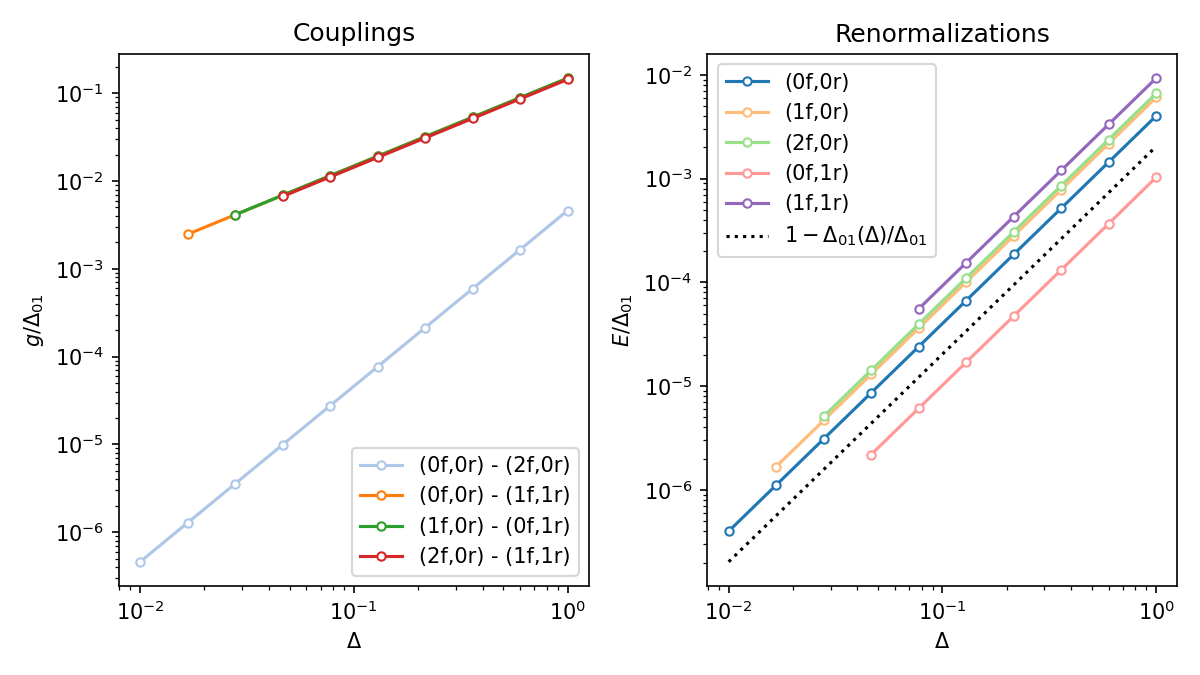

In [15]:
H_eff_vs_params = np.array([sq_ext.H_eff_SWT(H_0, H, n_eig) for H in H_qubit_list])
H_eff_0 = sq_ext.H_eff_SWT(H_0, H_0, n_eig)
N_f, N_r = sq_ext.get_energy_indices(sq_ext.sq_qubit(), sq_ext.sq_fluxonium(), sq_ext.sq_resonator())
fig, ax1, ax2 = sq_ext.plot_H_eff_vs_param(H_eff_vs_params, H_eff_0, param_values, param_name, N_f, N_r, threshold=1e-3, scale='log')

In [187]:
param_name = '\\varphi_{ext}'
param_values = np.linspace(0.49,0.5,20, endpoint=False)
H_qubit_list = sq_ext.KIT_qubit_vs_param(φ_ext=param_values)
H_0 = sq_ext.KIT_qubit_vs_param(Δ=0)[0]

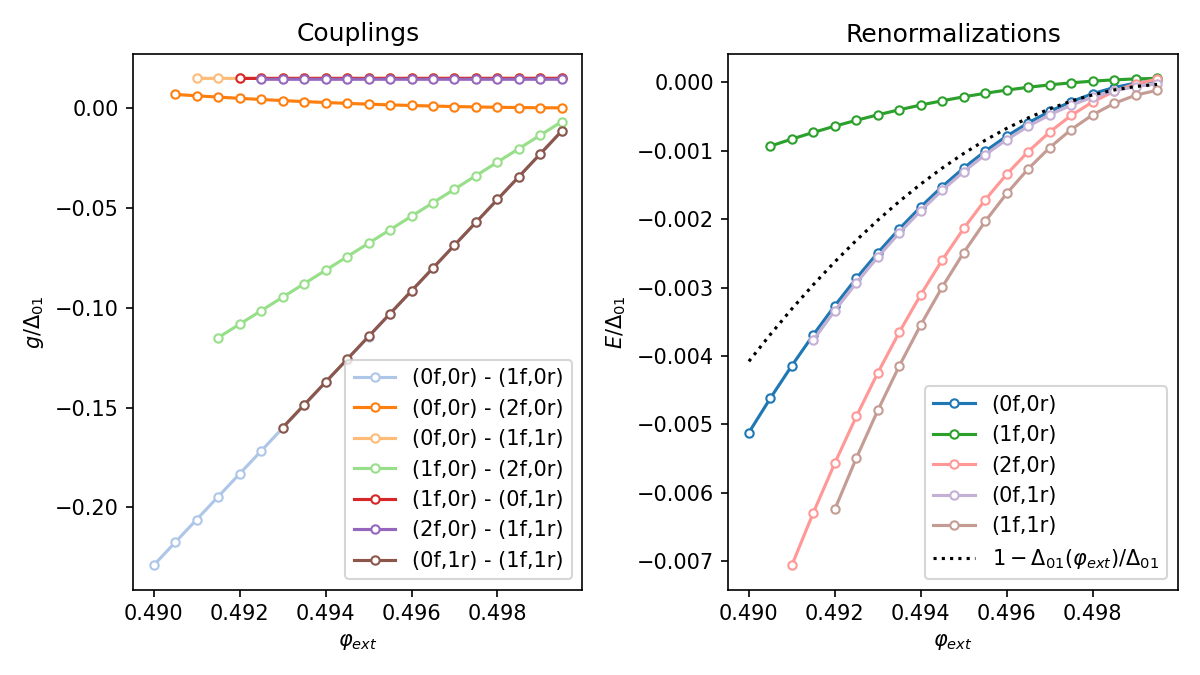

In [188]:
H_eff_vs_params = np.array([sq_ext.H_eff_SWT(H_0, H, n_eig) for H in H_qubit_list])
H_eff_0 = sq_ext.H_eff_SWT(H_0, H_0, n_eig)
N_f, N_r = sq_ext.get_energy_indices(sq_ext.sq_qubit(), sq_ext.sq_fluxonium(), sq_ext.sq_resonator())
fig, ax1, ax2 = sq_ext.plot_H_eff_vs_param(H_eff_vs_params, H_eff_0, param_values, param_name, N_f, N_r, threshold=1e-3)

In [180]:
param_name = 'E_J'
param_values = np.linspace(9, 11, 10)
H_qubit_list = sq_ext.KIT_qubit_vs_param(EJ=param_values)
H_0 = sq_ext.KIT_qubit_vs_param()[0]

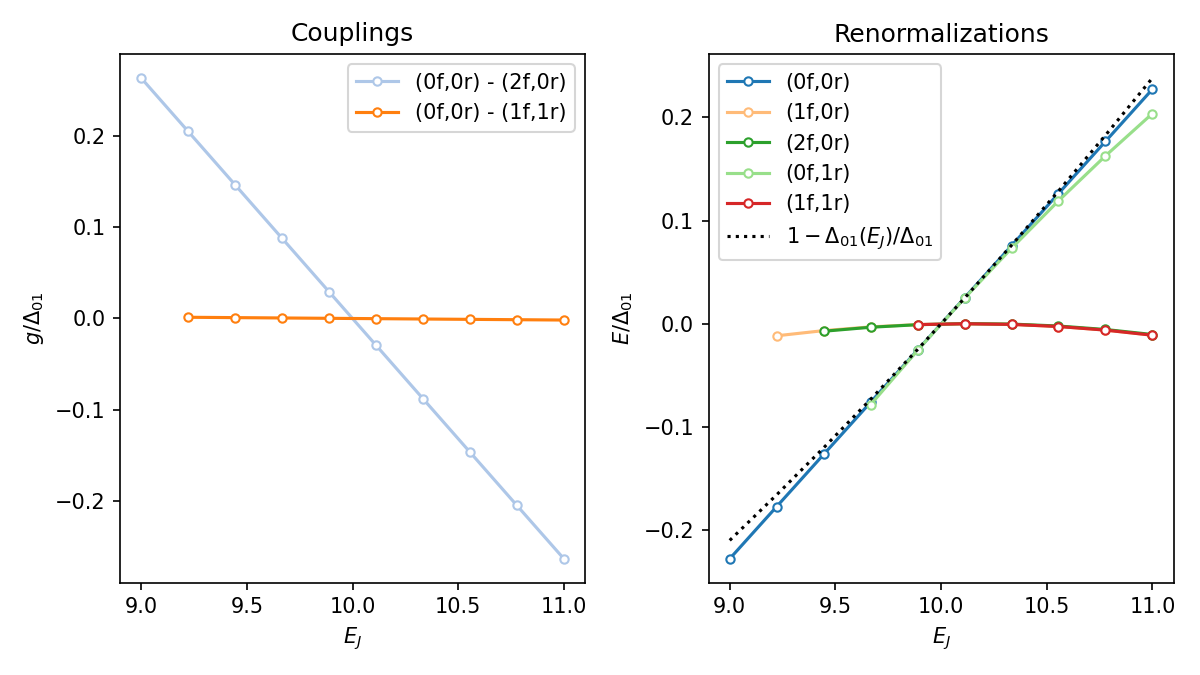

In [181]:
H_eff_vs_params = np.array([sq_ext.H_eff_SWT(H_0, H, n_eig) for H in H_qubit_list])
H_eff_0 = sq_ext.H_eff_SWT(H_0, H_0, n_eig)
N_f, N_r = sq_ext.get_energy_indices(sq_ext.sq_qubit(), sq_ext.sq_fluxonium(), sq_ext.sq_resonator())
fig, ax1, ax2 = sq_ext.plot_H_eff_vs_param(H_eff_vs_params, H_eff_0, param_values, param_name, N_f, N_r, threshold=1e-3 )

In [182]:
param_name = 'C'
param_values = np.linspace(14, 16, 10)
H_qubit_list = sq_ext.KIT_qubit_vs_param(C=param_values)
H_0 = sq_ext.KIT_qubit_vs_param()[0]

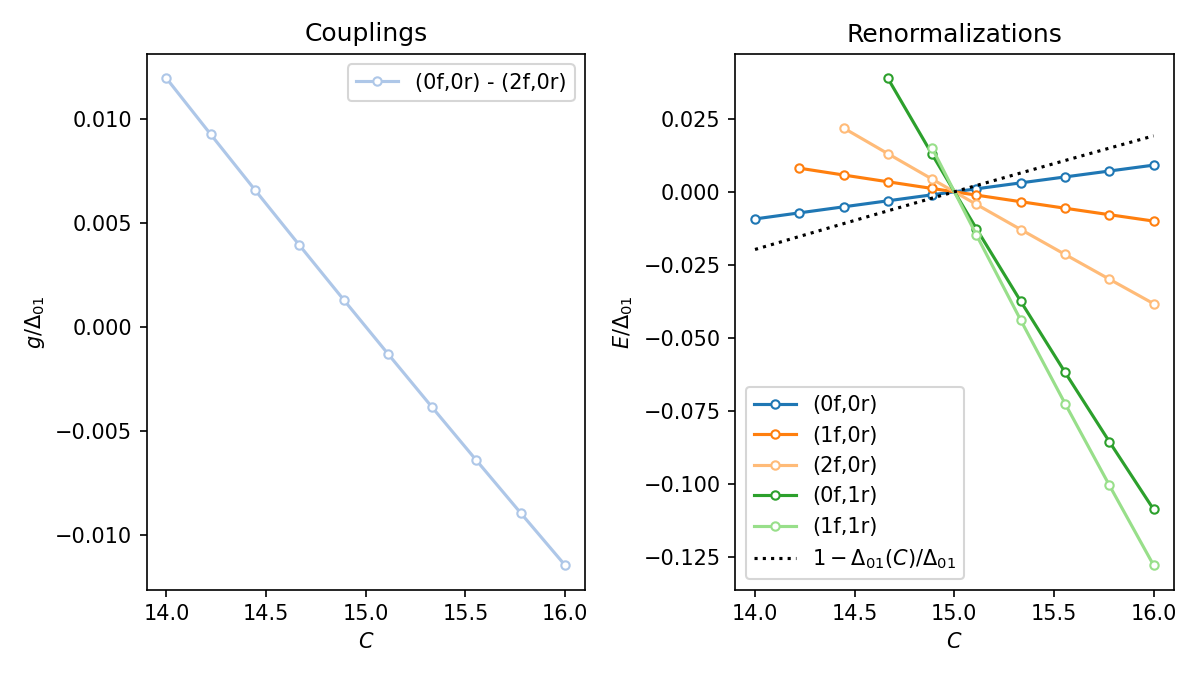

In [183]:
H_eff_vs_params = np.array([sq_ext.H_eff_SWT(H_0, H, n_eig) for H in H_qubit_list])
H_eff_0 = sq_ext.H_eff_SWT(H_0, H_0, n_eig)
N_f, N_r = sq_ext.get_energy_indices(sq_ext.sq_qubit(), sq_ext.sq_fluxonium(), sq_ext.sq_resonator())
fig, ax1, ax2 = sq_ext.plot_H_eff_vs_param(H_eff_vs_params, H_eff_0, param_values, param_name, N_f, N_r, threshold=1e-3 )

# qutrit vs parameter

In [184]:
n_eig  = 5

In [185]:
param_name = '\\Delta'
param_values = np.geomspace(1e-2, 1e0, 10)
H_qubit_list = sq_ext.KIT_qubit_vs_param(φ_ext = 0, Δ=param_values)
H_0 = sq_ext.KIT_qubit_vs_param(φ_ext = 0, Δ=0)[0]

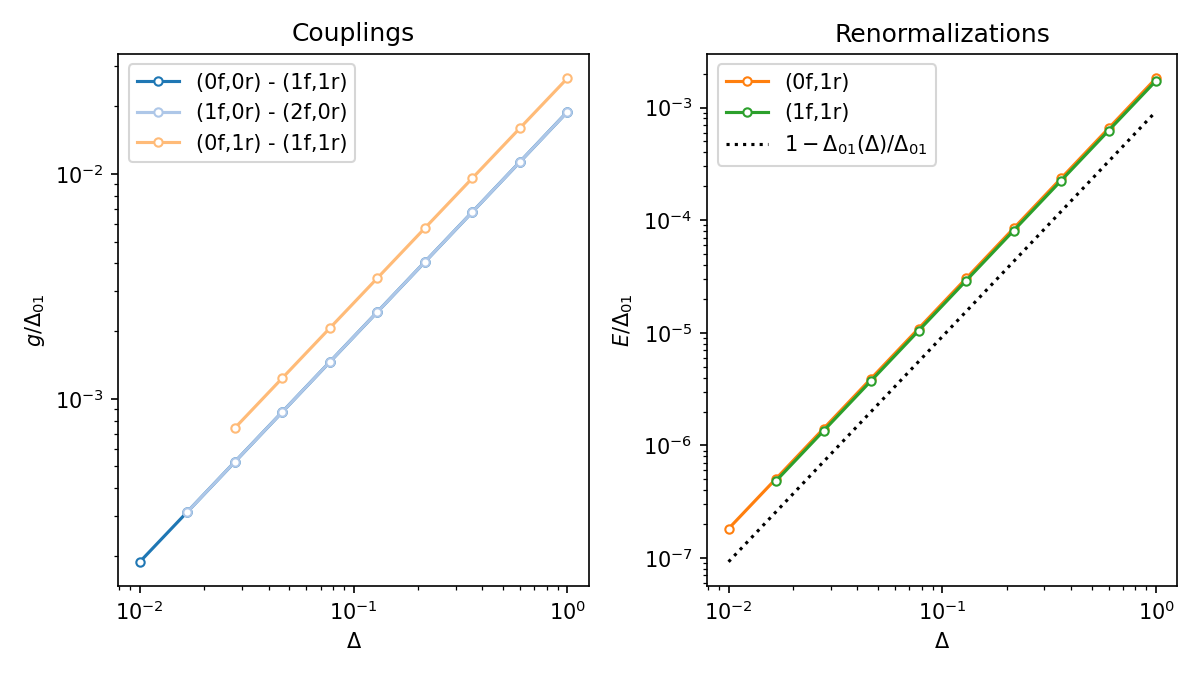

In [186]:
H_eff_vs_params = np.array([sq_ext.H_eff_SWT(H_0, H, n_eig) for H in H_qubit_list])
H_eff_0 = sq_ext.H_eff_SWT(H_0, H_0, n_eig)
N_f, N_r = sq_ext.get_energy_indices(sq_ext.sq_qubit(), sq_ext.sq_fluxonium(), sq_ext.sq_resonator())
fig, ax1, ax2 = sq_ext.plot_H_eff_vs_param(H_eff_vs_params, H_eff_0, param_values, param_name, N_f, N_r, threshold=1e-3, scale='log')

In [178]:
param_name = '\\varphi_{ext}'
param_values = np.linspace(-0.1,0.1,20, endpoint=False)
H_qubit_list = sq_ext.KIT_qubit_vs_param(φ_ext=param_values)
H_0 = sq_ext.KIT_qubit_vs_param(φ_ext = 0)[0]

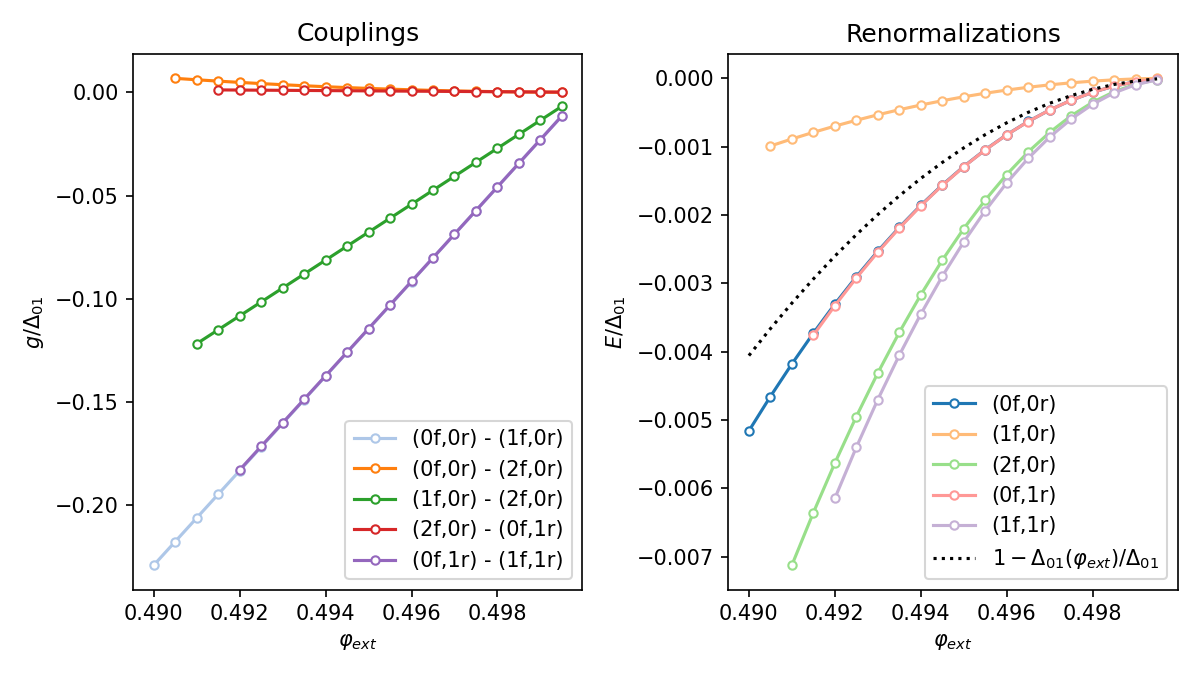

In [179]:
H_eff_vs_params = np.array([sq_ext.H_eff_SWT(H_0, H, n_eig) for H in H_qubit_list])
H_eff_0 = sq_ext.H_eff_SWT(H_0, H_0, n_eig)
N_f, N_r = sq_ext.get_energy_indices(sq_ext.sq_qubit(), sq_ext.sq_fluxonium(), sq_ext.sq_resonator())
fig, ax1, ax2 = sq_ext.plot_H_eff_vs_param(H_eff_vs_params, H_eff_0, param_values, param_name, N_f, N_r, threshold=1e-3)

In [180]:
param_name = 'E_J'
param_values = np.linspace(9, 11, 10)
H_qubit_list = sq_ext.KIT_qubit_vs_param(φ_ext = 0, EJ=param_values)
H_0 = sq_ext.KIT_qubit_vs_param(φ_ext = 0)[0]

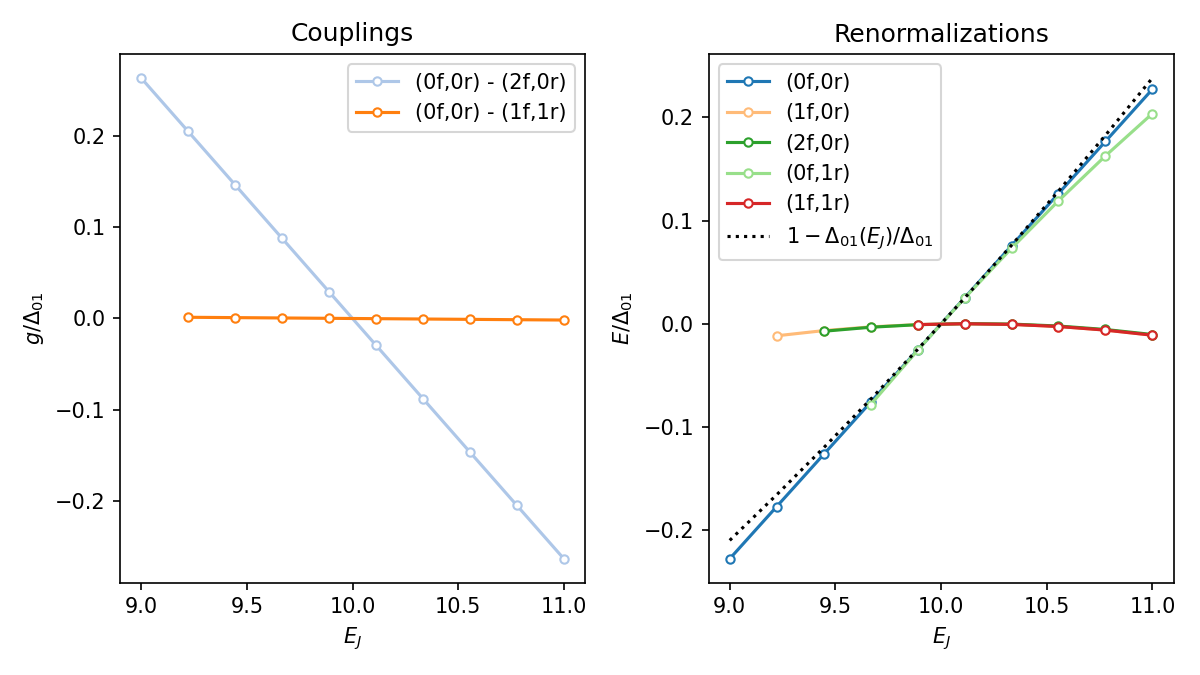

In [181]:
H_eff_vs_params = np.array([sq_ext.H_eff_SWT(H_0, H, n_eig) for H in H_qubit_list])
H_eff_0 = sq_ext.H_eff_SWT(H_0, H_0, n_eig)
N_f, N_r = sq_ext.get_energy_indices(sq_ext.sq_qubit(), sq_ext.sq_fluxonium(), sq_ext.sq_resonator())
fig, ax1, ax2 = sq_ext.plot_H_eff_vs_param(H_eff_vs_params, H_eff_0, param_values, param_name, N_f, N_r, threshold=1e-3 )

In [182]:
param_name = 'C'
param_values = np.linspace(14, 16, 10)
H_qubit_list = sq_ext.KIT_qubit_vs_param(C=param_values)
H_0 = sq_ext.KIT_qubit_vs_param()[0]

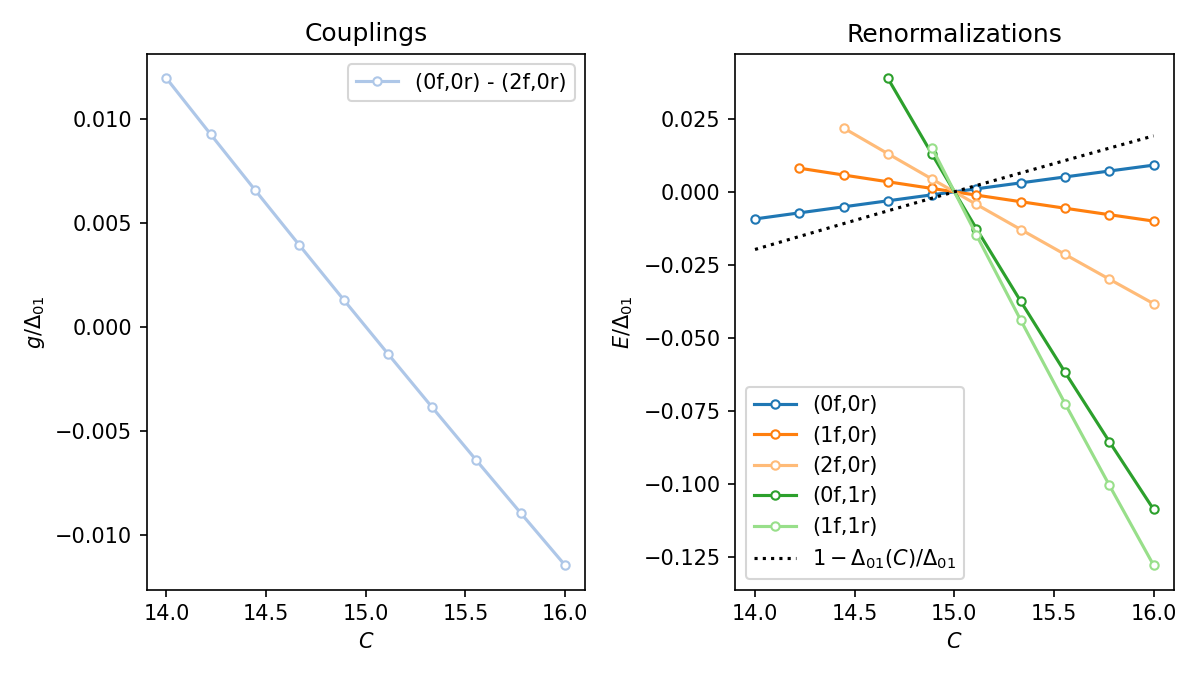

In [183]:
H_eff_vs_params = np.array([sq_ext.H_eff_SWT(H_0, H, n_eig) for H in H_qubit_list])
H_eff_0 = sq_ext.H_eff_SWT(H_0, H_0, n_eig)
N_f, N_r = sq_ext.get_energy_indices(sq_ext.sq_qubit(), sq_ext.sq_fluxonium(), sq_ext.sq_resonator())
fig, ax1, ax2 = sq_ext.plot_H_eff_vs_param(H_eff_vs_params, H_eff_0, param_values, param_name, N_f, N_r, threshold=1e-3 )

In [ ]:
Jorge Gidi